In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
#importing data
data_DSO599= pd.read_csv('DSO599_UPDATED_DS.csv')

In [94]:
data_DSO599.head()

,Worker,Age Range,Employee Type,Time Type,Highest Degree,Job Family Group,Job Family,Active Status,Terminated Year,Time in Position,...,Time in Position Minus Average Time in Job History Position,Manager Rating - Current,Employee Rating - Current,Manager Minus EE Rating - Current,Manager Rating - Second to Latest Review,Average Two Year,Manager Review,Salary Tiers - EE - JR,Performance Level,Is Time in position more than year of service?
0,Employee1,45-54,Staff,Full time,Bachelor of Science in Nursing (BSN),Nursing Services,Nursing (Union),Yes,NaN,0.82,...,-4.12,3.60,3.20,0.40,3.67,3.63,3.80,100-149,MID,0
1,Employee2,35-44,Staff,Full time,Bachelor of Science (BS),Administration,Administrative/Clerical Support,NaN,2019.0,5.72,...,3.94,4.00,4.00,0.00,4.67,4.33,3.90,50-99,HIGH,0
2,Employee3,35-44,Staff,Full time,Associate Degree in Nursing (ADN),Nursing Services,Nursing (Union),Yes,NaN,0.53,...,-3.36,3.56,3.00,0.56,3.44,3.50,2.73,50-99,MID,0
3,Employee5,35-44,Staff,Full time,Bachelor of Arts (BA),Academic Advising and Career Counseling,Admissions,Yes,NaN,3.22,...,1.69,3.30,3.40,-0.10,3.80,3.55,3.30,50-99,MID,0
4,Employee6,35-44,Staff,Full time,Bachelor of Arts (BA),Auxiliary Services 1,Auxiliary Services,Yes,NaN,5.62,...,-0.05,3.50,3.75,-0.25,3.40,3.45,4.25,50-99,MID,0


In [95]:
#checking initial count
data_DSO599.shape

(3459, 25)

In [96]:
#Verifying type of data variable
data_DSO599.dtypes

Worker                                                          object
Age Range                                                       object
Employee Type                                                   object
Time Type                                                       object
Highest Degree                                                  object
Job Family Group                                                object
Job Family                                                      object
Active Status                                                   object
Terminated Year                                                float64
Time in Position                                               float64
Years of Service                                                 int64
Months of Experience - SRI - JR                                  int64
Total Year Of Experience                                       float64
Number of Jobs in Job History - CRI - JR                         int64
Averag

In [97]:
data_DSO599.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 25 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Worker                                                       3459 non-null   object 
 1   Age Range                                                    3459 non-null   object 
 2   Employee Type                                                3459 non-null   object 
 3   Time Type                                                    3459 non-null   object 
 4   Highest Degree                                               3056 non-null   object 
 5   Job Family Group                                             3458 non-null   object 
 6   Job Family                                                   3459 non-null   object 
 7   Active Status                                                2714 non-null   o

In [98]:
#checking for duplicate data
sum(data_DSO599.duplicated())

0

In [99]:
#checking duplicate Worker ID
data_DSO599['Worker'].nunique()

3459

In [100]:
#checking all staff has been pulled
data_DSO599['Employee Type'].unique()

array(['Staff'], dtype=object)

In [101]:
#Droping irrelevant columns - Worker, Employee Type, Time Type
data_DSO599.drop(['Worker','Employee Type','Time Type','Months of Experience - SRI - JR'], axis = 1, inplace = True)

In [102]:
data_DSO599.shape

(3459, 21)

In [103]:
data_DSO599.head()

,Age Range,Highest Degree,Job Family Group,Job Family,Active Status,Terminated Year,Time in Position,Years of Service,Total Year Of Experience,Number of Jobs in Job History - CRI - JR,...,Time in Position Minus Average Time in Job History Position,Manager Rating - Current,Employee Rating - Current,Manager Minus EE Rating - Current,Manager Rating - Second to Latest Review,Average Two Year,Manager Review,Salary Tiers - EE - JR,Performance Level,Is Time in position more than year of service?
0,45-54,Bachelor of Science in Nursing (BSN),Nursing Services,Nursing (Union),Yes,NaN,0.82,20,14.833333,3,...,-4.12,3.60,3.20,0.40,3.67,3.63,3.80,100-149,MID,0
1,35-44,Bachelor of Science (BS),Administration,Administrative/Clerical Support,NaN,2019.0,5.72,8,10.666667,6,...,3.94,4.00,4.00,0.00,4.67,4.33,3.90,50-99,HIGH,0
2,35-44,Associate Degree in Nursing (ADN),Nursing Services,Nursing (Union),Yes,NaN,0.53,13,27.250000,7,...,-3.36,3.56,3.00,0.56,3.44,3.50,2.73,50-99,MID,0
3,35-44,Bachelor of Arts (BA),Academic Advising and Career Counseling,Admissions,Yes,NaN,3.22,8,10.750000,7,...,1.69,3.30,3.40,-0.10,3.80,3.55,3.30,50-99,MID,0
4,35-44,Bachelor of Arts (BA),Auxiliary Services 1,Auxiliary Services,Yes,NaN,5.62,16,11.333333,2,...,-0.05,3.50,3.75,-0.25,3.40,3.45,4.25,50-99,MID,0


In [104]:
#correcting variable names
data_DSO599.columns = data_DSO599.columns.str.replace(" ", "_").str.lower()

In [105]:
print(data_DSO599.columns)

Index(['age_range', 'highest_degree', 'job_family_group', 'job_family',
       'active_status', 'terminated_year', 'time_in_position',
       'years_of_service', 'total_year_of_experience',
       'number_of_jobs_in_job_history_-_cri_-_jr',
       'average_time_in_job_history',
       'time_in_position_minus_average_time_in_job_history_position',
       'manager_rating_-_current', 'employee_rating_-_current',
       'manager_minus_ee_rating_-_current',
       'manager_rating_-_second_to_latest_review', 'average_two_year',
       'manager_review', 'salary_tiers_-_ee_-_jr', 'performance_level',
       'is_time_in_position_more_than_year_of_service?'],
      dtype='object')


In [106]:
data_DSO599.describe()

,terminated_year,time_in_position,years_of_service,total_year_of_experience,number_of_jobs_in_job_history_-_cri_-_jr,average_time_in_job_history,time_in_position_minus_average_time_in_job_history_position,manager_rating_-_current,employee_rating_-_current,manager_minus_ee_rating_-_current,manager_rating_-_second_to_latest_review,average_two_year,manager_review,is_time_in_position_more_than_year_of_service?
count,864.000000,3458.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000
mean,2018.666667,2.347796,4.497832,9.857835,3.810928,2.974903,-0.627785,3.615744,3.741399,-0.125655,2.366146,3.599980,3.950107,0.000289
std,1.520810,1.715397,5.698333,7.857150,2.322368,2.699480,2.897985,0.576682,0.727131,0.691667,1.783173,0.504577,0.540698,0.017003
min,2012.000000,0.020000,0.000000,0.083333,1.000000,0.080000,-26.170000,0.000000,0.090000,-4.670000,0.000000,1.440000,2.000000,0.000000
25%,2018.000000,1.150000,1.000000,4.166667,2.000000,1.350000,-1.670000,3.200000,3.200000,-0.440000,0.000000,3.210000,3.600000,0.000000
50%,2019.000000,1.930000,2.000000,7.833333,3.000000,2.210000,-0.250000,3.600000,3.780000,0.000000,3.200000,3.560000,4.000000,0.000000
75%,2020.000000,3.010000,5.000000,13.083333,5.000000,3.620000,0.940000,4.000000,4.220000,0.200000,3.780000,4.000000,4.300000,0.000000
max,2020.000000,10.530000,47.000000,54.916667,17.000000,32.080000,6.870000,5.000000,5.000000,3.800000,5.000000,5.000000,5.000000,1.000000


# Finding Unique records for Categorical

In [107]:
data_DSO599['age_range'].unique()

array(['45-54', '35-44', '55+', '20-34'], dtype=object)

In [108]:
data_DSO599['highest_degree'].nunique()

178

In [109]:
data_DSO599['job_family_group'].nunique()

35

In [110]:
data_DSO599['job_family'].nunique()

146

In [111]:
data_DSO599['salary_tiers_-_ee_-_jr'].unique()

array(['100-149', '50-99', '150-249', '<50', '250-349'], dtype=object)

In [112]:
data_DSO599['performance_level'].unique()

array(['MID', 'HIGH', 'LOW'], dtype=object)

# Cross Verifying year of experience total with age 

Deleting the record for outliers in total_years_of_job_history

In [113]:
data_DSO599[data_DSO599['total_year_of_experience']>34]['age_range'].value_counts()

55+      44
45-54     8
35-44     4
Name: age_range, dtype: int64

In [114]:
data_DSO599[data_DSO599['total_year_of_experience']>44]['age_range'].value_counts()

55+      7
45-54    2
Name: age_range, dtype: int64

In [115]:
data_DSO599[data_DSO599['total_year_of_experience']>54]['age_range'].value_counts()

55+    1
Name: age_range, dtype: int64

# Checking Missing Value for all Variables

In [116]:
#checking if missing value in any columns
data_DSO599.isnull().any()

age_range                                                      False
highest_degree                                                  True
job_family_group                                                True
job_family                                                     False
active_status                                                   True
terminated_year                                                 True
time_in_position                                                True
years_of_service                                               False
total_year_of_experience                                       False
number_of_jobs_in_job_history_-_cri_-_jr                       False
average_time_in_job_history                                    False
time_in_position_minus_average_time_in_job_history_position    False
manager_rating_-_current                                       False
employee_rating_-_current                                      False
manager_minus_ee_rating_-_current 

# Checking for missing Values

In [117]:
data_DSO599[data_DSO599['terminated_year'].isnull()]

,age_range,highest_degree,job_family_group,job_family,active_status,terminated_year,time_in_position,years_of_service,total_year_of_experience,number_of_jobs_in_job_history_-_cri_-_jr,...,time_in_position_minus_average_time_in_job_history_position,manager_rating_-_current,employee_rating_-_current,manager_minus_ee_rating_-_current,manager_rating_-_second_to_latest_review,average_two_year,manager_review,salary_tiers_-_ee_-_jr,performance_level,is_time_in_position_more_than_year_of_service?
0,45-54,Bachelor of Science in Nursing (BSN),Nursing Services,Nursing (Union),Yes,NaN,0.82,20,14.833333,3,...,-4.12,3.60,3.20,0.40,3.67,3.63,3.80,100-149,MID,0
2,35-44,Associate Degree in Nursing (ADN),Nursing Services,Nursing (Union),Yes,NaN,0.53,13,27.250000,7,...,-3.36,3.56,3.00,0.56,3.44,3.50,2.73,50-99,MID,0
3,35-44,Bachelor of Arts (BA),Academic Advising and Career Counseling,Admissions,Yes,NaN,3.22,8,10.750000,7,...,1.69,3.30,3.40,-0.10,3.80,3.55,3.30,50-99,MID,0
4,35-44,Bachelor of Arts (BA),Auxiliary Services 1,Auxiliary Services,Yes,NaN,5.62,16,11.333333,2,...,-0.05,3.50,3.75,-0.25,3.40,3.45,4.25,50-99,MID,0
7,45-54,Doctor of Medicine (MD),Administrative Support,Project Management,Yes,NaN,1.10,11,9.500000,2,...,-3.65,3.44,3.67,-0.23,4.44,3.94,4.10,50-99,HIGH,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,35-44,Master of Business Administration (MBA),Nursing Services,Nursing,Yes,NaN,0.55,0,12.583333,6,...,-1.55,4.00,4.00,0.00,0.00,4.00,4.20,150-249,HIGH,0
3455,35-44,NaN,Clinical Administration 1,Clinical Support,Yes,NaN,0.55,0,9.333333,1,...,-8.78,2.80,4.20,-1.40,0.00,2.80,3.20,50-99,LOW,0
3456,20-34,Certificate (CERT),Clinical Administration 1,Clinical Support,Yes,NaN,0.55,0,9.833333,9,...,-0.54,3.20,3.20,0.00,0.00,3.20,3.20,50-99,MID,0
3457,20-34,Bachelor of Science (BS),Nursing Services,Nursing (Union),Yes,NaN,0.28,0,7.416667,2,...,-3.43,3.00,3.76,-0.76,0.00,3.00,4.00,100-149,MID,0


In [118]:
data_DSO599[data_DSO599['time_in_position'].isnull()]

,age_range,highest_degree,job_family_group,job_family,active_status,terminated_year,time_in_position,years_of_service,total_year_of_experience,number_of_jobs_in_job_history_-_cri_-_jr,...,time_in_position_minus_average_time_in_job_history_position,manager_rating_-_current,employee_rating_-_current,manager_minus_ee_rating_-_current,manager_rating_-_second_to_latest_review,average_two_year,manager_review,salary_tiers_-_ee_-_jr,performance_level,is_time_in_position_more_than_year_of_service?
891,35-44,Juris Doctor (JD),Academic Advising and Career Counseling,Admissions,NaN,2020.0,NaN,0,4.416667,3,...,-1.47,4.11,4.78,-0.67,4.0,4.05,4.7,50-99,HIGH,1


In [119]:
#replacing time_in_position with 0 
data_DSO599['time_in_position'] = data_DSO599['time_in_position'].fillna(0)

In [120]:
#replacing active_status with 'No'
data_DSO599['active_status'] = data_DSO599['active_status'].fillna('No')

In [121]:
#Creating bands for Employed/Terminated/Rejoined
conditions = [(data_DSO599['terminated_year'].notna()) & (data_DSO599['active_status'] == 'Yes'),
             (data_DSO599['terminated_year'].isnull() ) & (data_DSO599['active_status'] == 'Yes'),
             (data_DSO599['active_status'] == 'No')]

choices = ['Rejoined', 'Employed', 'Terminated']

data_DSO599['flag'] = np.select(conditions, choices, default='None')

data_DSO599['flag'].value_counts()

Employed      2595
Terminated     745
Rejoined       119
Name: flag, dtype: int64

In [122]:
data_DSO599.isnull().any()

age_range                                                      False
highest_degree                                                  True
job_family_group                                                True
job_family                                                     False
active_status                                                  False
terminated_year                                                 True
time_in_position                                               False
years_of_service                                               False
total_year_of_experience                                       False
number_of_jobs_in_job_history_-_cri_-_jr                       False
average_time_in_job_history                                    False
time_in_position_minus_average_time_in_job_history_position    False
manager_rating_-_current                                       False
employee_rating_-_current                                      False
manager_minus_ee_rating_-_current 

# Exporting Cleaned file

In [123]:
#data_DSO599.to_excel("DSO599_cleaned_data.xlsx") 

#  Finding the count of age

In [124]:
data_DSO599['age_range'].value_counts()

20-34    1543
35-44    1065
45-54     549
55+       302
Name: age_range, dtype: int64

In [125]:
#checking missing value in highest degree 
sum(data_DSO599['highest_degree'].isnull())/len(data_DSO599)

0.11650766117374964

In [126]:
sum(data_DSO599['job_family_group'].isnull())/len(data_DSO599)

0.0002891008962127783

In [127]:
sum(data_DSO599['job_family'].isnull())/len(data_DSO599)

0.0

# Checking some logics


In [128]:
#checking records where time in position is more than years of service
data_DSO599['time_in_position-years_of_service'] = data_DSO599['time_in_position']-data_DSO599['years_of_service']

In [129]:
data_DSO599[data_DSO599['time_in_position-years_of_service']>1]

,age_range,highest_degree,job_family_group,job_family,active_status,terminated_year,time_in_position,years_of_service,total_year_of_experience,number_of_jobs_in_job_history_-_cri_-_jr,...,employee_rating_-_current,manager_minus_ee_rating_-_current,manager_rating_-_second_to_latest_review,average_two_year,manager_review,salary_tiers_-_ee_-_jr,performance_level,is_time_in_position_more_than_year_of_service?,flag,time_in_position-years_of_service
473,20-34,NaN,Administrative Support,Project Management,No,2018.0,5.18,4,8.833333,4,...,3.22,0.78,3.00,3.50,3.70,50-99,MID,0,Terminated,1.18
959,55+,Master of Business Administration (MBA),Information Technology,Computer Quality Assurance,No,2020.0,5.01,4,29.333333,2,...,3.00,0.78,3.89,3.83,3.78,100-149,HIGH,0,Terminated,1.01
1047,45-54,Bachelor of Science in Management (BSM),"Accounting, Finance and Banking",Billing/Collections - Medical,Yes,NaN,5.27,4,0.666667,1,...,3.00,0.00,3.00,3.00,4.00,<50,MID,0,Employed,1.27
1095,45-54,Certificate (CERT),"Accounting, Finance and Banking",Accounting,Yes,NaN,5.04,4,17.166667,8,...,4.78,0.00,4.56,4.67,4.50,50-99,HIGH,0,Employed,1.04
1125,35-44,Master of Science in Nursing (MSN),Nursing Services,Nursing,No,2020.0,4.22,3,5.666667,4,...,3.67,0.00,3.56,3.61,4.00,100-149,MID,0,Terminated,1.22
1433,20-34,Bachelor of Arts (BA),Administration,Administrative/Clerical Support,No,2018.0,1.35,0,6.083333,4,...,4.33,-0.44,0.00,3.89,4.00,<50,HIGH,0,Terminated,1.35
1553,20-34,Certificate (CERT),Clinical Administration 1,Clinical Support,No,2019.0,2.10,1,2.083333,1,...,3.00,0.22,0.00,3.22,3.73,<50,MID,0,Terminated,1.10
1618,35-44,Diploma (DIPL),Research and Clinical Support,Clinical Tech-Other (Non-Union),No,2019.0,2.13,1,0.916667,2,...,3.67,-0.34,0.00,3.33,3.10,<50,MID,0,Terminated,1.13
1926,35-44,Registered Nurse License (RN),Nursing Services,Nursing,No,2018.0,1.03,0,23.833333,9,...,3.78,-0.56,0.00,3.22,2.97,100-149,MID,0,Terminated,1.03
2169,20-34,Master of Engineering (MENG),Information Technology,IT Business Analysis,Yes,NaN,2.68,1,3.416667,3,...,4.80,-1.80,3.00,3.00,4.00,100-149,MID,0,Employed,1.68


The above difference is because years_of_service is in integer and time_in_position is in float. 

In [130]:
#leaving rate
left_rate=data_DSO599.active_status.value_counts()/len(data_DSO599)
left_rate

Yes    0.78462
No     0.21538
Name: active_status, dtype: float64

looks like 78% of employee stayed and 22 % employess left

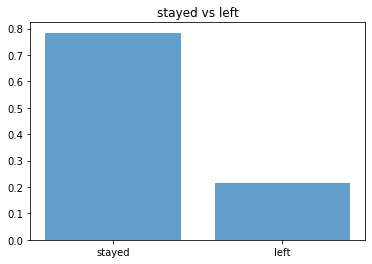

In [131]:
%matplotlib inline
#left_rate.plot(kind='bar');
locations=[1,2]
labels=['stayed','left']
plt.bar(locations,left_rate,tick_label=labels,alpha=0.7);
plt.title('stayed vs left');

In [132]:
#overview for those who left  vs those who stayed
left_summary=data_DSO599.groupby('active_status')
left_summary.mean()

,terminated_year,time_in_position,years_of_service,total_year_of_experience,number_of_jobs_in_job_history_-_cri_-_jr,average_time_in_job_history,time_in_position_minus_average_time_in_job_history_position,manager_rating_-_current,employee_rating_-_current,manager_minus_ee_rating_-_current,manager_rating_-_second_to_latest_review,average_two_year,manager_review,is_time_in_position_more_than_year_of_service?,time_in_position-years_of_service
active_status,,,,,,,,,,,,,,,
No,2019.032215,2.346483,4.154362,9.546868,3.842953,2.844309,-0.497826,3.446456,3.703302,-0.256846,1.928040,3.471262,3.904805,0.001342,-1.807879
Yes,2016.378151,2.347292,4.592115,9.943196,3.802137,3.010752,-0.663460,3.662214,3.751857,-0.089643,2.486408,3.635313,3.962542,0.000000,-2.244823


In [133]:
# correlation matrix
corr=data_DSO599.corr()
corr

,terminated_year,time_in_position,years_of_service,total_year_of_experience,number_of_jobs_in_job_history_-_cri_-_jr,average_time_in_job_history,time_in_position_minus_average_time_in_job_history_position,manager_rating_-_current,employee_rating_-_current,manager_minus_ee_rating_-_current,manager_rating_-_second_to_latest_review,average_two_year,manager_review,is_time_in_position_more_than_year_of_service?,time_in_position-years_of_service
terminated_year,1.000000e+00,0.100000,-0.039588,0.023844,-0.022020,0.062696,-2.792533e-17,-0.111881,-0.048215,-0.053061,-0.067506,-0.128160,-0.093565,0.029861,0.077709
time_in_position,9.999975e-02,1.000000,0.470528,0.149489,-0.047839,0.197808,4.077435e-01,0.115969,0.083041,0.009391,0.370721,0.122927,-0.018910,-0.023268,-0.188595
years_of_service,-3.958767e-02,0.470528,1.000000,0.304453,-0.041616,0.353815,-5.102579e-02,0.068339,-0.003415,0.060568,0.345641,0.091422,-0.023364,-0.013425,-0.955290
total_year_of_experience,2.384430e-02,0.149489,0.304453,1.000000,0.489505,0.566471,-4.391710e-01,-0.008692,-0.026186,0.020282,0.103338,0.010844,-0.018302,-0.011778,-0.288751
number_of_jobs_in_job_history_-_cri_-_jr,-2.201959e-02,-0.047839,-0.041616,0.489505,1.000000,-0.236533,1.920101e-01,0.014071,0.027348,-0.017018,0.020797,0.035336,0.018924,-0.005939,0.030286
average_time_in_job_history,6.269640e-02,0.197808,0.353815,0.566471,-0.236533,1.000000,-8.143994e-01,-0.014766,-0.042771,0.032653,0.084347,-0.009355,-0.037819,-0.009482,-0.327498
time_in_position_minus_average_time_in_job_history_position,-2.792533e-17,0.407744,-0.051026,-0.439171,0.192010,-0.814399,1.000000e+00,0.082408,0.089002,-0.024857,0.140899,0.081488,0.024034,-0.004943,0.193416
manager_rating_-_current,-1.118808e-01,0.115969,0.068339,-0.008692,0.014071,-0.014766,8.240817e-02,1.000000,0.456543,0.353806,0.298612,0.900758,0.316706,0.014577,-0.037199
employee_rating_-_current,-4.821518e-02,0.083041,-0.003415,-0.026186,0.027348,-0.042771,8.900158e-02,0.456543,1.000000,-0.670627,0.121688,0.488848,0.143293,0.024293,0.031626
manager_minus_ee_rating_-_current,-5.306077e-02,0.009391,0.060568,0.020282,-0.017018,0.032653,-2.485651e-02,0.353806,-0.670627,1.000000,0.121043,0.237100,0.113416,-0.013385,-0.064263


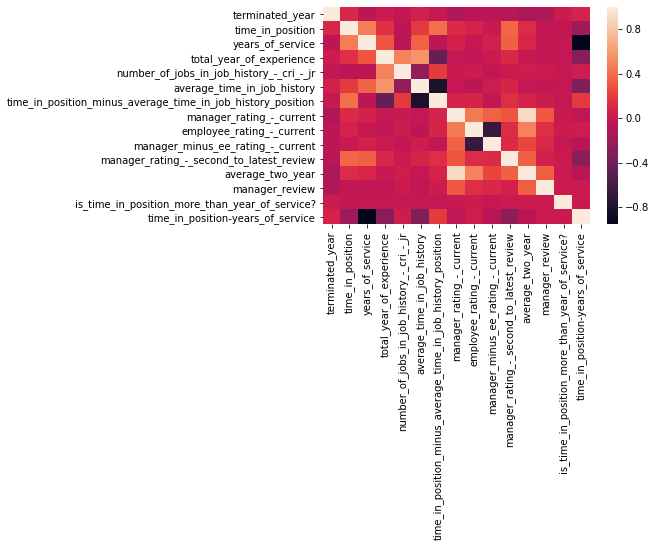

In [134]:
#heatmap ofcorrelation
sns.heatmap(corr);

# Salary vs Leaving Company

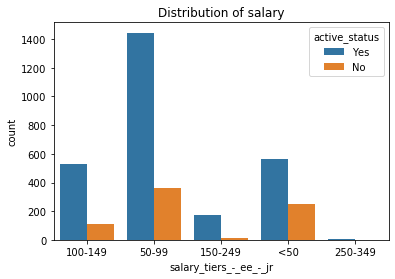

In [135]:
sns.countplot(x='salary_tiers_-_ee_-_jr',hue='active_status',data=data_DSO599).set_title('Distribution of salary');

# Job Family vs Company Leaving

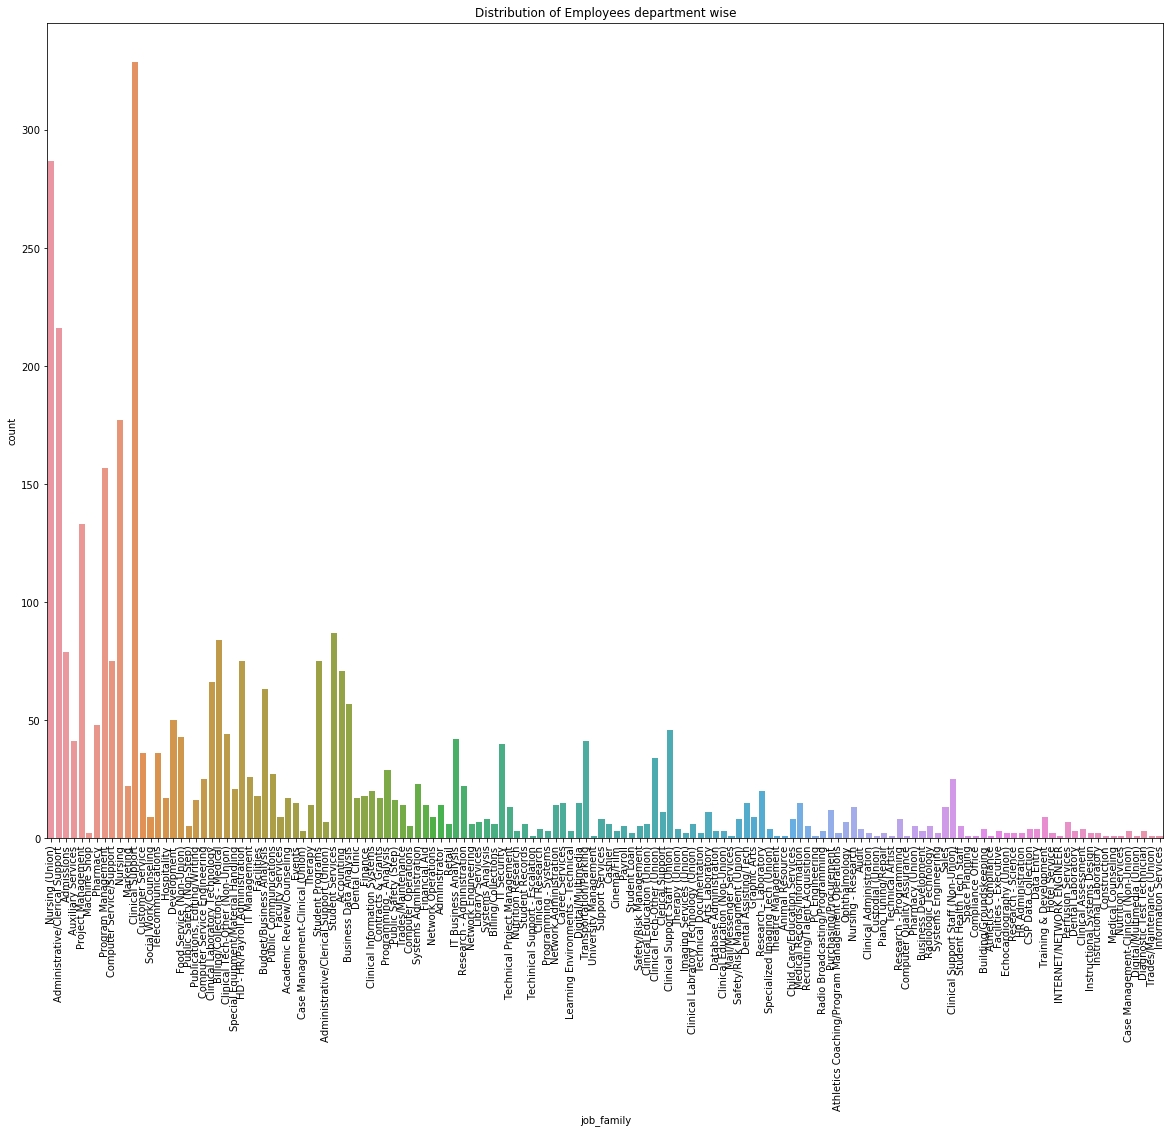

In [136]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax = ax, x='job_family',data=data_DSO599).set_title('Distribution of Employees department wise');
plt.xticks(rotation=90);

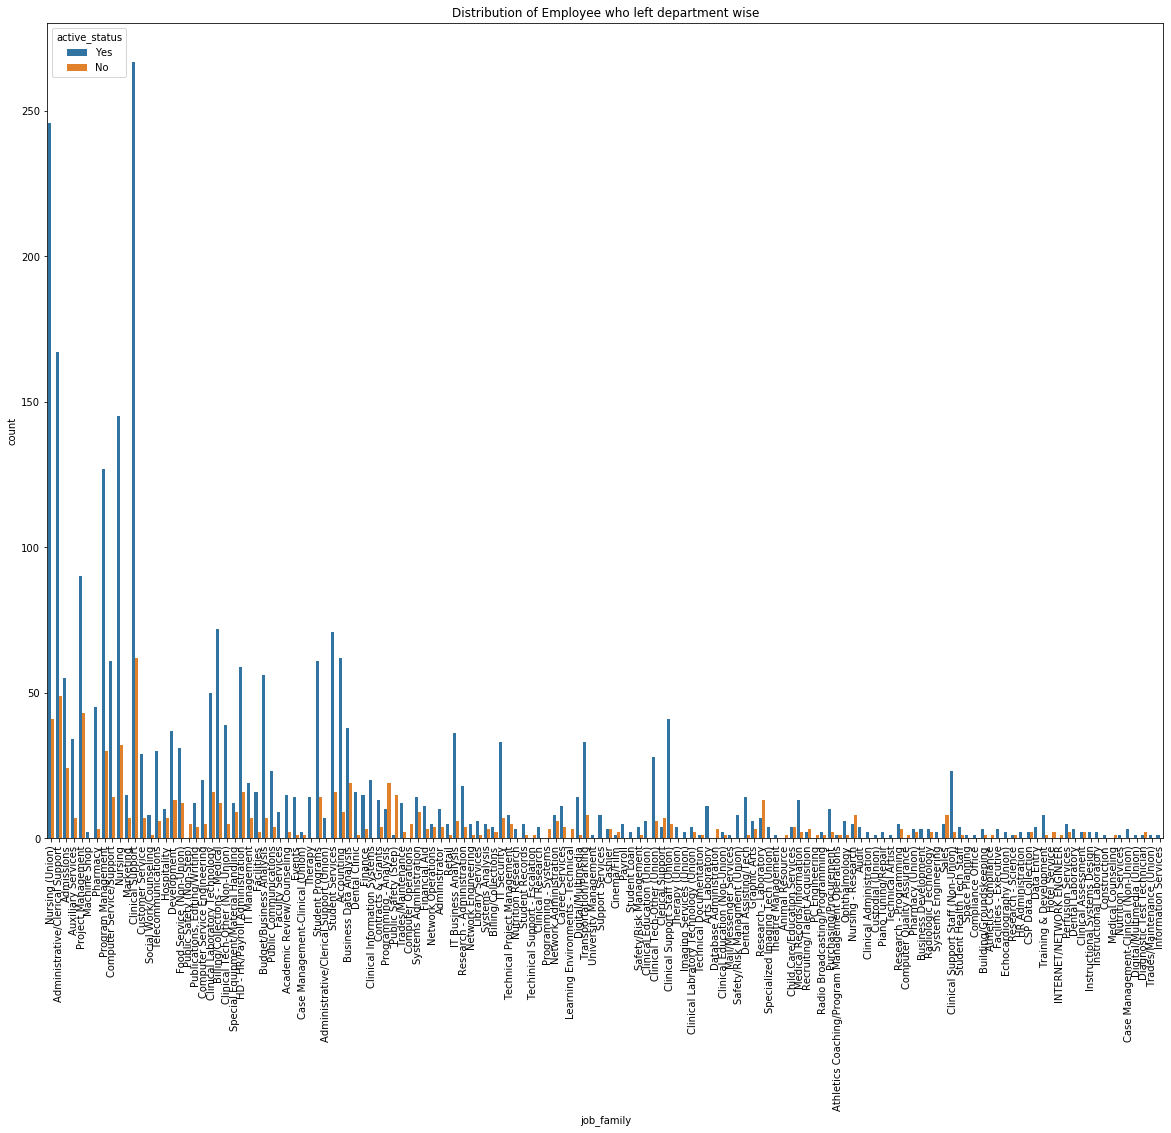

In [137]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax =ax, x='job_family',hue='active_status',data=data_DSO599).set_title('Distribution of Employee who left department wise');
plt.xticks(rotation=90);

# Age vs Leaving Company

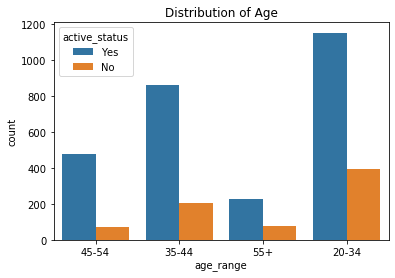

In [138]:
sns.countplot(x='age_range',hue='active_status',data=data_DSO599).set_title('Distribution of Age');

# Feature Importance 

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [140]:
#mapping of string value to integer categorical value
data_DSO599['age_range_int']=data_DSO599['age_range'].astype('category').cat.codes
data_DSO599['highest_degree_int']=data_DSO599['highest_degree'].astype('category').cat.codes
data_DSO599['job_family_group_int']=data_DSO599['job_family_group'].astype('category').cat.codes
data_DSO599['job_family_int']=data_DSO599['job_family'].astype('category').cat.codes
data_DSO599['active_status_int']=data_DSO599['active_status'].astype('category').cat.codes
data_DSO599['terminated_year_int']=data_DSO599['terminated_year'].astype('category').cat.codes
data_DSO599['flag_int']=data_DSO599['flag'].astype('category').cat.codes
data_DSO599['salary_tiers_-_ee_-_jr_int']=data_DSO599['salary_tiers_-_ee_-_jr'].astype('category').cat.codes
data_DSO599['performance_level_int']=data_DSO599['performance_level'].astype('category').cat.codes
data_DSO599.head()

,age_range,highest_degree,job_family_group,job_family,active_status,terminated_year,time_in_position,years_of_service,total_year_of_experience,number_of_jobs_in_job_history_-_cri_-_jr,...,time_in_position-years_of_service,age_range_int,highest_degree_int,job_family_group_int,job_family_int,active_status_int,terminated_year_int,flag_int,salary_tiers_-_ee_-_jr_int,performance_level_int
0,45-54,Bachelor of Science in Nursing (BSN),Nursing Services,Nursing (Union),Yes,NaN,0.82,20,14.833333,3,...,-19.18,2,54,25,89,1,-1,0,0,2
1,35-44,Bachelor of Science (BS),Administration,Administrative/Clerical Support,No,2019.0,5.72,8,10.666667,6,...,-2.28,1,36,3,2,0,7,2,3,0
2,35-44,Associate Degree in Nursing (ADN),Nursing Services,Nursing (Union),Yes,NaN,0.53,13,27.250000,7,...,-12.47,1,1,25,89,1,-1,0,3,2
3,35-44,Bachelor of Arts (BA),Academic Advising and Career Counseling,Admissions,Yes,NaN,3.22,8,10.750000,7,...,-4.78,1,8,0,5,1,-1,0,3,2
4,35-44,Bachelor of Arts (BA),Auxiliary Services 1,Auxiliary Services,Yes,NaN,5.62,16,11.333333,2,...,-10.38,1,8,7,11,1,-1,0,3,2


In [141]:
#removing string variables
data_DSO599_v1 = data_DSO599.drop(['age_range','highest_degree','job_family_group','job_family','active_status','terminated_year','flag','is_time_in_position_more_than_year_of_service?','salary_tiers_-_ee_-_jr','performance_level'], axis = 1)

In [142]:
data_DSO599_v2 = data_DSO599_v1.drop(['flag_int','time_in_position-years_of_service','terminated_year_int'], axis = 1)

In [143]:
data_DSO599_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   time_in_position                                             3459 non-null   float64
 1   years_of_service                                             3459 non-null   int64  
 2   total_year_of_experience                                     3459 non-null   float64
 3   number_of_jobs_in_job_history_-_cri_-_jr                     3459 non-null   int64  
 4   average_time_in_job_history                                  3459 non-null   float64
 5   time_in_position_minus_average_time_in_job_history_position  3459 non-null   float64
 6   manager_rating_-_current                                     3459 non-null   float64
 7   employee_rating_-_current                                    3459 non-null   f

In [144]:
#removing Y from X 
Y=data_DSO599_v2['active_status_int']
X=data_DSO599_v2.drop('active_status_int',axis=1)

In [145]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Using Logistic Regression

In [146]:
reg=LogisticRegression()
reg=reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
print ('logistic regressiy_predict[:,0]on accuracy score:',accuracy_score(y_test,y_predict))

logistic regressiy_predict[:,0]on accuracy score: 0.7904624277456648


C:\Users\sasth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Using Decision Tree

In [147]:
#using DecisionTree
clf=DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
print('Decision Tree accuracy score',accuracy_score(y_test,y_predict))

Decision Tree accuracy score 0.7239884393063584


# Using Random Forest

In [148]:
Rtree=RandomForestClassifier()
Rtree.fit(x_train,y_train)
y_predict=Rtree.predict(x_test)
print('Random forest accuracy score',accuracy_score(y_test,y_predict))

Random forest accuracy score 0.8078034682080925


In [75]:
importances=Rtree.feature_importances_
indices=np.argsort(importances)[::-1]
print ('feature ranking:')
for i in range(X.shape[1]):
     print ("feature no. {}: {} ({})".format(i+1,X.columns[indices[i]],importances[indices[i]]))

feature ranking:
feature no. 1: time_in_position (0.09657549345331004)
feature no. 2: manager_rating_-_current (0.07745934788611179)
feature no. 3: manager_review (0.07266754425432666)
feature no. 4: average_two_year (0.07174893512976414)
feature no. 5: total_year_of_experience (0.07081266783054585)
feature no. 6: time_in_position_minus_average_time_in_job_history_position (0.07019619913611234)
feature no. 7: average_time_in_job_history (0.06876501044363817)
feature no. 8: manager_minus_ee_rating_-_current (0.06678796748517916)
feature no. 9: job_family_int (0.06449191423924276)
feature no. 10: highest_degree_int (0.055635751750805144)
feature no. 11: employee_rating_-_current (0.05379492661117081)
feature no. 12: years_of_service (0.05262819684611192)
feature no. 13: job_family_group_int (0.04712045873865928)
feature no. 14: manager_rating_-_second_to_latest_review (0.04377435891621157)
feature no. 15: number_of_jobs_in_job_history_-_cri_-_jr (0.0367829535637308)
feature no. 16: salar

# Running the selected model on unsplitted real data

In [76]:
Rtree_on_data=RandomForestClassifier()
Rtree_on_data.fit(X,Y)
y_predict_on_data=Rtree_on_data.predict_proba(X)

In [77]:
y_predict_on_data[:,0]

array([0.03, 0.74, 0.08, ..., 0.05, 0.14, 0.18])

In [78]:
len(y_predict_on_data[:,0])

3459

In [79]:
data_DSO599['prob_of_leaving'] = y_predict_on_data[:,0]

In [80]:
#removing unnecessary variables
data_DSO599_final = data_DSO599.drop(['age_range_int','highest_degree_int','job_family_group_int','job_family_int','active_status_int','terminated_year_int','flag_int','is_time_in_position_more_than_year_of_service?','salary_tiers_-_ee_-_jr_int','performance_level_int'], axis = 1)

In [81]:
data_DSO599_final.head()

,age_range,highest_degree,job_family_group,job_family,active_status,terminated_year,time_in_position,years_of_service,total_year_of_experience,number_of_jobs_in_job_history_-_cri_-_jr,...,employee_rating_-_current,manager_minus_ee_rating_-_current,manager_rating_-_second_to_latest_review,average_two_year,manager_review,salary_tiers_-_ee_-_jr,performance_level,flag,time_in_position-years_of_service,prob_of_leaving
0,45-54,Bachelor of Science in Nursing (BSN),Nursing Services,Nursing (Union),Yes,NaN,0.82,20,14.833333,3,...,3.20,0.40,3.67,3.63,3.80,100-149,MID,Employed,-19.18,0.03
1,35-44,Bachelor of Science (BS),Administration,Administrative/Clerical Support,No,2019.0,5.72,8,10.666667,6,...,4.00,0.00,4.67,4.33,3.90,50-99,HIGH,Terminated,-2.28,0.74
2,35-44,Associate Degree in Nursing (ADN),Nursing Services,Nursing (Union),Yes,NaN,0.53,13,27.250000,7,...,3.00,0.56,3.44,3.50,2.73,50-99,MID,Employed,-12.47,0.08
3,35-44,Bachelor of Arts (BA),Academic Advising and Career Counseling,Admissions,Yes,NaN,3.22,8,10.750000,7,...,3.40,-0.10,3.80,3.55,3.30,50-99,MID,Employed,-4.78,0.08
4,35-44,Bachelor of Arts (BA),Auxiliary Services 1,Auxiliary Services,Yes,NaN,5.62,16,11.333333,2,...,3.75,-0.25,3.40,3.45,4.25,50-99,MID,Employed,-10.38,0.14


In [83]:
data_DSO599_final.to_excel("data_DSO599_final.xlsx") 